In [1]:
!pip3 install seaborn

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns


import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 28})

In [3]:
kyoto_1_clickstream = pd.read_csv('dataset/data1_clickstream.csv', delimiter=',')
kyoto_1_clickstream['date'], kyoto_1_clickstream['time'] = kyoto_1_clickstream['eventtime'].str.split(' ', 1).str
kyoto_1_clickstream = kyoto_1_clickstream[['userid', 'date']]

In [4]:
#kyoto_1_score[kyoto_1_score['userid'] == 'ds125'].groupby['date'].size()
plot_df = kyoto_1_clickstream.groupby(['userid', 'date']).size().reset_index(name='counts')
plot_df
#for user in set(kyoto_1_score.userid):
#    kyoto_1_score

,userid,date,counts
0,ds101,2017-12-13,131
1,ds101,2017-12-26,89
2,ds101,2018-01-21,59
3,ds101,2018-01-23,557
4,ds101,2018-01-24,470
5,ds102,2017-11-22,8
6,ds103,2017-11-22,454
7,ds104,2017-11-22,89
8,ds105,2017-12-13,138
9,ds105,2018-01-24,402


[Text(0.5,0,'2017-12-13'),
 Text(1.5,0,'2017-12-26'),
 Text(2.5,0,'2018-01-21'),
 Text(3.5,0,'2018-01-23'),
 Text(4.5,0,'2018-01-24'),
 Text(5.5,0,'2017-11-22'),
 Text(6.5,0,'2017-11-22'),
 Text(7.5,0,'2017-11-22'),
 Text(8.5,0,'2017-12-13'),
 Text(9.5,0,'2018-01-24'),
 Text(10.5,0,'2017-11-22'),
 Text(11.5,0,'2017-12-13'),
 Text(12.5,0,'2018-01-24'),
 Text(13.5,0,'2017-12-13'),
 Text(14.5,0,'2018-01-23'),
 Text(15.5,0,'2018-01-24')]

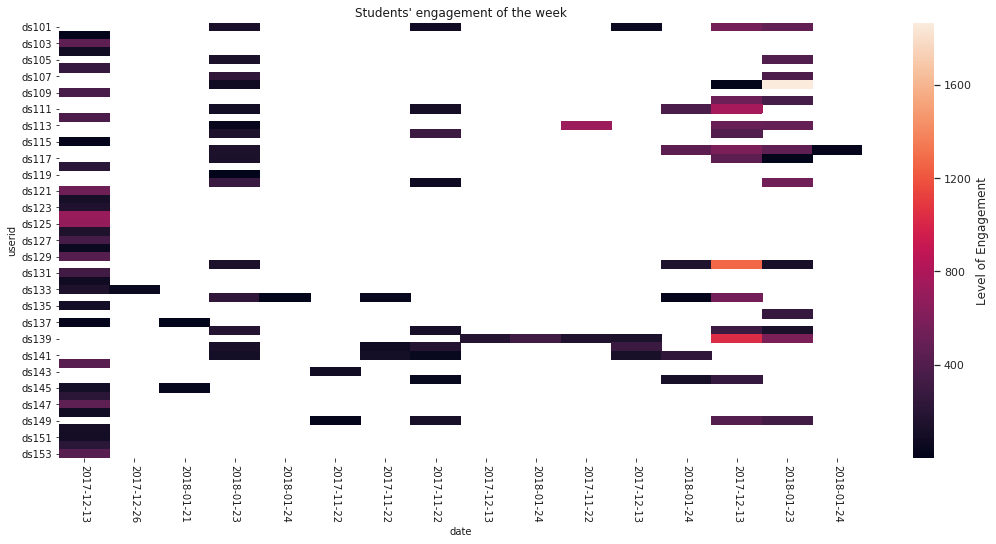

In [5]:

fig1, ax1 = plt.subplots(figsize=(18, 8))
ax1.set_title('Students\' engagement of the week')
pivot = plot_df.pivot(index='userid', columns='date', values='counts')

sns.set()
ax1 = sns.heatmap(pivot, cbar_kws={'label': 'Level of Engagement'})

plot_df['date'] = pd.to_datetime(plot_df['date'])
ax1.set_xticklabels(plot_df['date'].dt.strftime('%Y-%m-%d'), rotation=-90)


In [6]:
kyoto_1_score = pd.read_csv('dataset/data1_score.csv')
kyoto_x_all = pd.merge(plot_df, kyoto_1_score, on='userid')

[Text(0.5,0,'2017-12-13'),
 Text(1.5,0,'2017-12-26'),
 Text(2.5,0,'2018-01-21'),
 Text(3.5,0,'2018-01-23'),
 Text(4.5,0,'2018-01-24'),
 Text(5.5,0,'2017-11-22'),
 Text(6.5,0,'2017-11-22'),
 Text(7.5,0,'2017-11-22'),
 Text(8.5,0,'2017-12-13'),
 Text(9.5,0,'2018-01-24'),
 Text(10.5,0,'2017-11-22'),
 Text(11.5,0,'2017-12-13'),
 Text(12.5,0,'2018-01-24'),
 Text(13.5,0,'2017-12-13'),
 Text(14.5,0,'2018-01-23'),
 Text(15.5,0,'2018-01-24')]

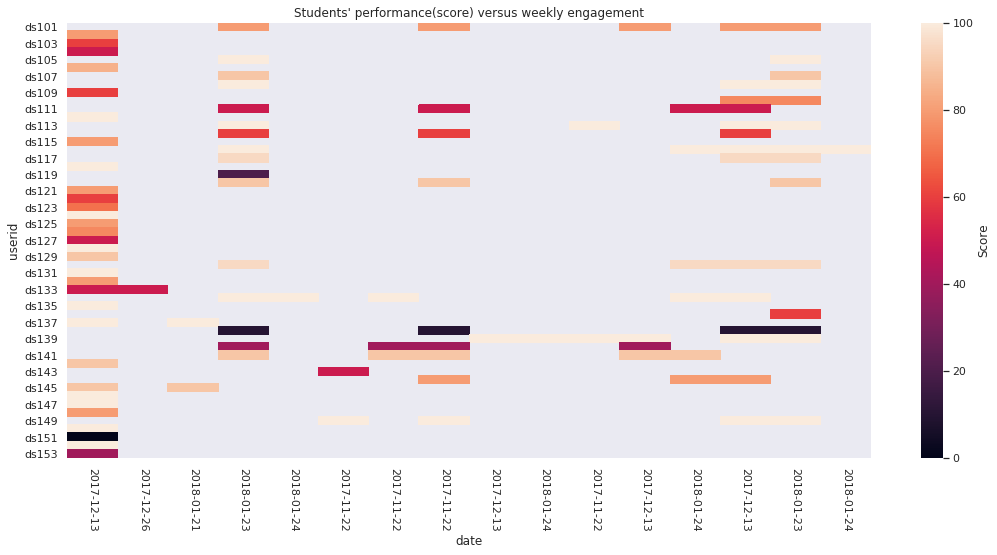

In [7]:
fig1, ax1 = plt.subplots(figsize=(18, 8))
ax1.set_title('Students\' performance(score) versus weekly engagement')
pivot = kyoto_x_all.pivot(index='userid', columns='date', values='score')

sns.set()
ax1 = sns.heatmap(pivot, cbar_kws={'label': 'Score'})

plot_df['date'] = pd.to_datetime(kyoto_x_all['date'])
ax1.set_xticklabels(kyoto_x_all['date'].dt.strftime('%Y-%m-%d'), rotation=-90)